# Latihan

data : adult.csv  
* target : income  

preprocess:  
* missing value : simple imputer with constant  
* one hot encoding : relationship, race, sex  
* binary encoding : workclass, marital status, occupation, native country    
* ordinal encoding : education (already encoded)  
* no treatment : numerical

out : fnlwgt  
Random state 10, data splitting 70:30 model Tree(max depth 5,  criterion entropy)


An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
adult=pd.read_csv('adult.csv')

In [139]:
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [140]:
## drop kolom yg tidak digunakan

In [177]:
adult.drop(columns='fnlwgt',inplace=True)

## missing value

In [142]:
adult.replace('?',np.nan,inplace=True)

In [143]:
adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [145]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.compose import ColumnTransformer

In [147]:
imputer=SimpleImputer(strategy='constant', fill_value='No-description')

pipe=Pipeline([                  
    ('impute', imputer),
    ('encode', ce.BinaryEncoder())
])

In [148]:
transformer=ColumnTransformer([
    ('Impute Encode', pipe,['workclass', 'marital.status', 'occupation', 'native.country']),
    ('One Hot', OneHotEncoder(),['relationship', 'race', 'sex'])

], remainder='passthrough')

In [178]:
pd.DataFrame(transformer.fit_transform(adult.drop(columns=['income','education'])))

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,90.0,9.0,0.0,4356.0,40.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,82.0,9.0,0.0,4356.0,18.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,66.0,10.0,0.0,4356.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,54.0,4.0,0.0,3900.0,40.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,41.0,10.0,0.0,3900.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,22.0,10.0,0.0,0.0,40.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,27.0,12.0,0.0,0.0,38.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,40.0,9.0,0.0,0.0,40.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,58.0,9.0,0.0,0.0,40.0


In [150]:
transformer.transformers_

[('Impute Encode',
  Pipeline(steps=[('impute',
                   SimpleImputer(fill_value='No-description',
                                 strategy='constant')),
                  ('encode', BinaryEncoder())]),
  ['workclass', 'marital.status', 'occupation', 'native.country']),
 ('One Hot', OneHotEncoder(), ['relationship', 'race', 'sex']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [166]:
list(transformer.transformers_[0][1][1].get_feature_names())

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [176]:
binary = ce.BinaryEncoder()
adult_bin = binary.fit_transform(adult[['workclass', 'marital.status', 'occupation', 'native.country']])
adult_bin

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,marital.status_0,marital.status_1,marital.status_2,marital.status_3,occupation_0,...,occupation_2,occupation_3,occupation_4,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,native.country_6
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
32557,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
32558,0,0,0,1,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1
32559,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1


In [153]:
list(transformer.transformers_[1][1].get_feature_names())

['x0_Husband',
 'x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Amer-Indian-Eskimo',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Female',
 'x2_Male']

In [154]:
features=list(transformer.transformers_[1][1].get_feature_names())+['education.num','age','capital.gain','capital.loss','hours.per.week']+list(transformer.transformers_[0][1][1].get_feature_names())

In [179]:
adult1=pd.DataFrame(transformer.fit_transform(adult.drop(columns=['income','education'])), columns=features)
adult1

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,x0_Husband,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Amer-Indian-Eskimo,x1_Asian-Pac-Islander,x1_Black,x1_Other,...,2_2,2_3,2_4,3_0,3_1,3_2,3_3,3_4,3_5,3_6
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,90.0,9.0,0.0,4356.0,40.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,82.0,9.0,0.0,4356.0,18.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,66.0,10.0,0.0,4356.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,54.0,4.0,0.0,3900.0,40.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,41.0,10.0,0.0,3900.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,22.0,10.0,0.0,0.0,40.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,27.0,12.0,0.0,0.0,38.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,40.0,9.0,0.0,0.0,40.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,58.0,9.0,0.0,0.0,40.0


Data Splitting

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [157]:
adult['income']=np.where(adult['income']=='<=50K',1,0)
x = adult1
y = adult['income']

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state = 10)

Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [160]:
tree=DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree.fit(x_train,y_train)
y_predict=tree.predict(x_test)

In [161]:
print('Nilai akurasi model DTC :', accuracy_score(y_test,y_predict))

Nilai akurasi model DTC : 0.8416419285494933


In [162]:
importance_table=pd.DataFrame({
    'importance': tree.feature_importances_},index=features)
importance_table.sort_values(by='importance',ascending=False)

,importance
x1_Black,0.384984
3_3,0.236525
3_4,0.226698
x1_Amer-Indian-Eskimo,0.068177
3_2,0.040959
3_5,0.021721
3_6,0.019942
1_1,0.000994
2_1,0.000000
1_0,0.000000


<AxesSubplot:>

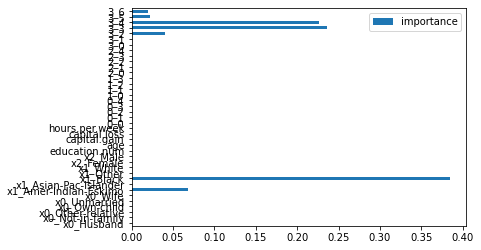

In [163]:
importance_table.plot(kind='barh')

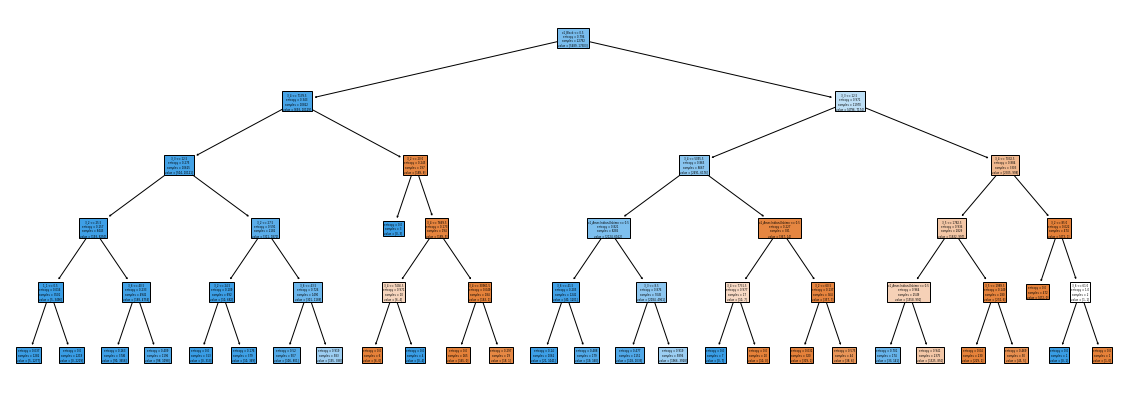

In [164]:
plt.figure(figsize=(20,7))
plot_tree(tree, feature_names=features, filled=True)
plt.show()